In [1]:
import tensorflow as tf
import numpy as np
tf.enable_eager_execution()

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('./mnist/data/', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
X, y = mnist.train.next_batch(1)

In [5]:
X.reshape((28,28))

array([[0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
      

In [6]:
import matplotlib.pyplot as plt

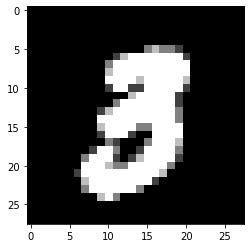

In [7]:
plt.imshow(X.reshape((28,28)),cmap='gray')

In [8]:
X = X.reshape(1,28,28,1)
X.shape

(1, 28, 28, 1)

In [11]:
initializer = tf.contrib.layers.xavier_initializer()

In [12]:
w1 = tf.Variable(initializer([3,3,1,32]))
w1

<tf.Variable 'Variable:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[-0.02826188, -0.01248068, -0.01581635,  0.05080068,
          -0.03498438,  0.0492069 , -0.08023943, -0.0668788 ,
           0.0624928 ,  0.10744219, -0.08485252,  0.06920362,
          -0.03639752,  0.01733023, -0.07009088, -0.12596278,
          -0.00207926, -0.05744318,  0.04231228,  0.03865248,
          -0.07446943,  0.04553694,  0.12409954, -0.08565862,
          -0.07733742,  0.09907751, -0.04593256,  0.11660857,
          -0.12104112, -0.01059234, -0.10731643,  0.09873149]],

        [[ 0.10852517,  0.10978924, -0.03855038, -0.07150833,
          -0.10797371, -0.10800597,  0.07973841, -0.08683435,
          -0.02368613,  0.00136417, -0.08073619, -0.02981628,
           0.07205899,  0.12221889,  0.02484901,  0.03608409,
          -0.07421247, -0.01238373, -0.12662652,  0.00677648,
           0.05194652,  0.02878675,  0.10213985,  0.04665829,
           0.09897436, -0.02858424, -0.04767071, -0.12329394,

In [13]:
w1.shape

TensorShape([Dimension(3), Dimension(3), Dimension(1), Dimension(32)])

In [33]:
convolution_h1 = tf.nn.conv2d(X, w1, strides=1, padding='SAME')
convolution_h1

<tf.Tensor: id=71, shape=(1, 28, 28, 32), dtype=float32, numpy=
array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0.

In [43]:
convolution_h1 = tf.nn.relu(convolution_h1)

In [44]:
convolution_h1.shape

TensorShape([Dimension(1), Dimension(28), Dimension(28), Dimension(32)])

In [45]:
w2 = tf.Variable(initializer([3,3,32,64]))
w2

<tf.Variable 'Variable:0' shape=(3, 3, 32, 64) dtype=float32, numpy=
array([[[[-0.06483215, -0.07027056, -0.05472406, ..., -0.06625187,
           0.01438526, -0.03515285],
         [-0.04553195, -0.0712719 , -0.0209352 , ..., -0.06454884,
          -0.01610652, -0.02076658],
         [-0.08224326, -0.05575655, -0.05023923, ...,  0.02293936,
           0.0135257 ,  0.00316694],
         ...,
         [ 0.08040126, -0.05907492,  0.06123348, ..., -0.07138652,
          -0.01231364, -0.07084799],
         [-0.07849187,  0.07124373, -0.01894248, ..., -0.04811893,
          -0.02774398,  0.05118669],
         [-0.01524302, -0.00788647,  0.0760879 , ..., -0.03229716,
           0.01876678, -0.06364173]],

        [[ 0.02508128, -0.02399316,  0.01649644, ..., -0.05174925,
           0.07197917, -0.03377058],
         [ 0.04040408, -0.04503906, -0.02656154, ...,  0.01115026,
          -0.07537705, -0.00267879],
         [ 0.01612159,  0.04999844,  0.02248053, ..., -0.04831843,
          -0.000

In [46]:
w2.shape

TensorShape([Dimension(3), Dimension(3), Dimension(32), Dimension(64)])

In [48]:
convolution_h2 = tf.nn.conv2d(convolution_h1, w2, strides=1, padding='SAME')
convolution_h2 = tf.nn.relu(convolution_h2)
convolution_h2

<tf.Tensor: id=119, shape=(1, 28, 28, 64), dtype=float32, numpy=
array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0

In [49]:
convolution_h2_pool = tf.nn.max_pool(convolution_h2, ksize=2, strides=1, padding='SAME')
convolution_h2_pool
convolution_h2_pool = tf.nn.relu(convolution_h2_pool)

In [50]:
convolution_h2_pool = tf.reshape(convolution_h2_pool, [-1, 28*28*64])
convolution_h2_pool.shape

TensorShape([Dimension(1), Dimension(50176)])

In [51]:
w3 = tf.Variable(initializer([28*28*64,512]))
w3

<tf.Variable 'Variable:0' shape=(50176, 512) dtype=float32, numpy=
array([[-0.00705909,  0.00240814, -0.00800696, ..., -0.00153798,
        -0.00431735, -0.00889795],
       [ 0.00252997,  0.00051578, -0.00836821, ...,  0.01018371,
        -0.00719598,  0.0063691 ],
       [-0.00211763, -0.0070629 , -0.00308817, ...,  0.01052184,
        -0.00273377, -0.00948332],
       ...,
       [-0.00109809,  0.0080992 , -0.00355953, ...,  0.00751135,
        -0.00161035, -0.00194384],
       [ 0.00134588, -0.01045921, -0.00318426, ...,  0.01044894,
         0.01075066, -0.00859276],
       [-0.00713949, -0.00689254,  0.00157806, ..., -0.00656143,
         0.00219367,  0.00275343]], dtype=float32)>

In [52]:
w3.shape

TensorShape([Dimension(50176), Dimension(512)])

In [53]:
y_h1 = tf.matmul(convolution_h2_pool, w3)

In [54]:
y_h1 = tf.nn.relu(y_h1)

In [55]:
w4 = tf.Variable(initializer([512,10]))
w4

<tf.Variable 'Variable:0' shape=(512, 10) dtype=float32, numpy=
array([[-0.03573634, -0.01752803, -0.01719895, ..., -0.06164799,
        -0.06687108,  0.0173765 ],
       [-0.0982182 , -0.08953101,  0.06486902, ..., -0.08678447,
        -0.05726721,  0.09505519],
       [-0.10051002,  0.05766246,  0.03434197, ...,  0.00856848,
         0.03363692, -0.08997028],
       ...,
       [ 0.02097655, -0.09291012,  0.09643451, ..., -0.09483682,
        -0.01312555,  0.08271388],
       [-0.02881762, -0.07486732, -0.0286447 , ..., -0.002996  ,
        -0.10087708, -0.00242034],
       [-0.09712148, -0.03079322,  0.03877085, ...,  0.07674529,
        -0.0432678 ,  0.06639545]], dtype=float32)>

In [56]:
y_h2 = tf.matmul(y_h1, w4)
y_h2

<tf.Tensor: id=158, shape=(1, 10), dtype=float32, numpy=
array([[-0.0506605 , -0.11531073, -0.02188369, -0.12630533,  0.02253403,
        -0.02447609, -0.09609725,  0.04394361,  0.01409686,  0.0066078 ]],
      dtype=float32)>

In [57]:
y_h2 = tf.nn.softmax(y_h2)
y_h2

<tf.Tensor: id=159, shape=(1, 10), dtype=float32, numpy=
array([[0.09826225, 0.09211057, 0.101131  , 0.0911034 , 0.10572427,
        0.10086917, 0.09389745, 0.10801218, 0.10483601, 0.10405382]],
      dtype=float32)>

## MNIST

In [58]:
mnist.train.num_examples

55000

In [59]:
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)
total_batch

550

In [60]:
optimizer = tf.train.AdamOptimizer(0.001)

In [66]:
for step in range(5):
    total_cost= 0
    for i in range(total_batch):
        X, y = mnist.train.next_batch(batch_size)
        X = X.reshape(-1,28,28,1)
        with tf.GradientTape() as tape:
            convolution_h1 = tf.nn.conv2d(X, w1, strides=1, padding='SAME')
            convolution_h1 = tf.nn.relu(convolution_h1)
            convolution_h2 = tf.nn.conv2d(convolution_h1, w2, strides=1, padding='SAME')
            convolution_h2 = tf.nn.relu(convolution_h2)
            convolution_h2_pool = tf.nn.max_pool(convolution_h2, ksize=2, strides=1, padding='SAME')
            convolution_h2_pool = tf.nn.relu(convolution_h2_pool)
            convolution_h2_pool = tf.reshape(convolution_h2_pool,[-1,28*28*64])
            y_h1 = tf.matmul(convolution_h2_pool, w3)
            y_h1 = tf.nn.relu(y_h1)
            y_h2 = tf.matmul(y_h1, w4)
            y_h2 = tf.nn.softmax(y_h2)
            cost = -tf.reduce_sum(y * tf.log(y_h2))/len(y_h2)
            grads = tape.gradient(cost, [w1,w2,w3,w4])
        optimizer.apply_gradients(grads_and_vars=zip(grads,[w1,w2,w3,w4]))
        total_cost += cost
    print(f'step: {step} cost: {total_cost/total_batch}')

step: 0 cost: 0.10388487577438354
step: 1 cost: 0.030986348167061806
step: 2 cost: 0.019309470430016518
step: 3 cost: 0.009975263848900795
step: 4 cost: 0.008444835431873798


In [82]:
test_images = mnist.test.images[0:100]
test_labels = mnist.test.labels[0:100]
test_images = test_images.reshape(-1,28,28,1)

In [93]:
convolution_h1 = tf.nn.conv2d(test_images, w1, strides=1, padding='SAME')
convolution_h1 = tf.nn.relu(convolution_h1)
convolution_h2 = tf.nn.conv2d(convolution_h1, w2, strides=1, padding='SAME')
convolution_h2 = tf.nn.relu(convolution_h2)
convolution_h2_pool = tf.nn.max_pool(convolution_h2, ksize=2, strides=1, padding='SAME')
convolution_h2_pool = tf.nn.relu(convolution_h2_pool)
convolution_h2_pool = tf.reshape(convolution_h2_pool,[-1,28*28*64])
y_h1 = tf.matmul(convolution_h2_pool, w3)
y_h1 = tf.nn.relu(y_h1)
y_h2 = tf.matmul(y_h1, w4)
predict = tf.nn.softmax(y_h2)

In [94]:
predict

<tf.Tensor: id=244236, shape=(100, 10), dtype=float32, numpy=
array([[4.27163357e-14, 4.51023463e-12, 7.38754891e-11, 3.52524954e-10,
        2.76918706e-13, 7.74049715e-13, 1.00661201e-18, 1.00000000e+00,
        1.15132838e-12, 5.00797293e-10],
       [4.38749080e-12, 5.11595211e-09, 1.00000000e+00, 1.99357590e-15,
        1.61411835e-14, 2.35068453e-21, 7.00796349e-17, 9.55113928e-15,
        6.99138559e-16, 5.33168541e-16],
       [2.28968559e-12, 1.00000000e+00, 2.26045960e-09, 3.71502755e-14,
        3.81311835e-08, 1.91899807e-09, 2.19473842e-10, 5.81768340e-08,
        1.20341532e-11, 1.65333347e-09],
       [9.99993563e-01, 6.73204770e-10, 5.66928338e-06, 3.53125196e-09,
        4.89002838e-10, 3.58581047e-11, 1.94932709e-10, 7.43588480e-09,
        9.52160395e-09, 6.77278138e-07],
       [9.86700144e-09, 6.00073324e-09, 1.01314965e-08, 2.97077363e-11,
        9.97248471e-01, 1.86218291e-10, 8.32385449e-09, 2.60359201e-09,
        2.27685689e-07, 2.75123748e-03],
       [7.543

In [95]:
predict01 = tf.argmax(predict,1)
predict01

<tf.Tensor: id=244238, shape=(100,), dtype=int64, numpy=
array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4,
       6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9], dtype=int64)>

In [96]:
target = tf.argmax(test_labels, 1)
target

<tf.Tensor: id=244241, shape=(100,), dtype=int64, numpy=
array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4,
       6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9], dtype=int64)>

In [97]:
ac01 = tf.equal(predict01, target)
ac01

<tf.Tensor: id=244242, shape=(100,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])>

In [98]:
ac02 = tf.cast(ac01, dtype='float32')
ac02

<tf.Tensor: id=244243, shape=(100,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
      dtype=float32)>

In [99]:
ac03 = tf.reduce_mean(ac02)
ac03

<tf.Tensor: id=244245, shape=(), dtype=float32, numpy=1.0>

In [100]:
accuracy = tf.reduce_mean(tf.cast(tf.equal(predict01, target), dtype=tf.float32))
accuracy.numpy()

1.0

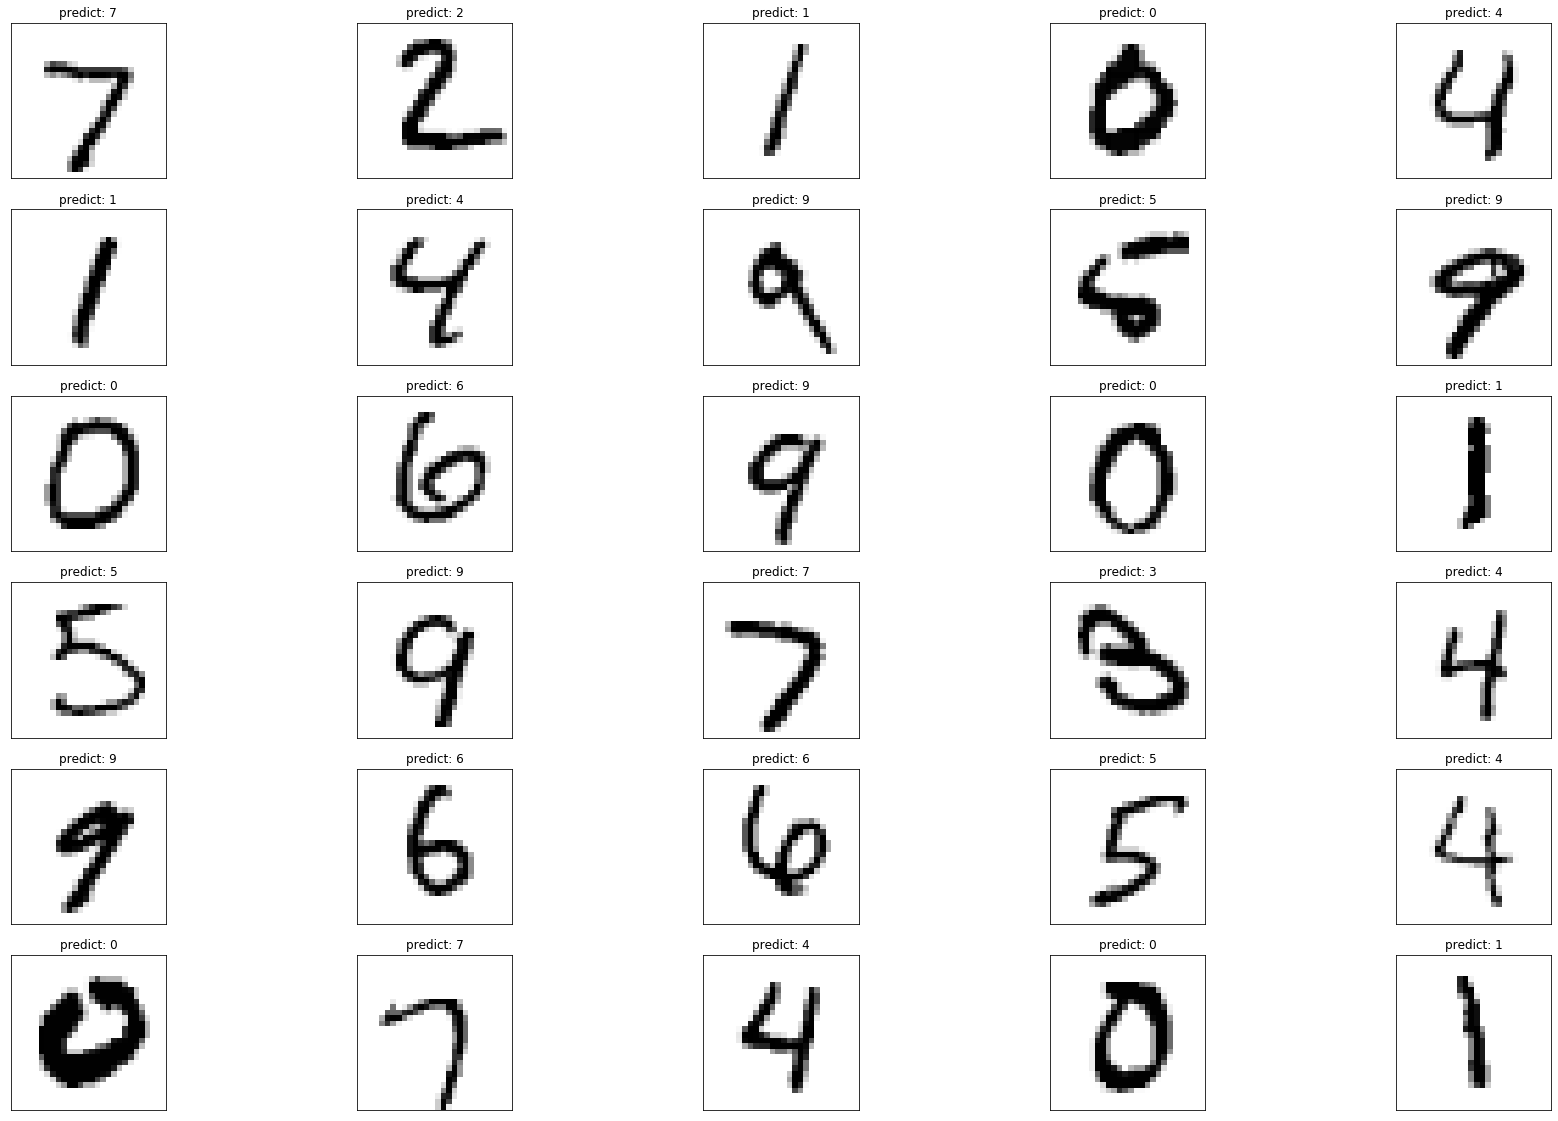

In [101]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30,20))
for i in range(30):
    subplot = fig.add_subplot(6,5,i+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('predict: %d' %predict01[i])
    subplot.imshow(mnist.test.images[i].reshape((28,28)),
                  cmap=plt.cm.gray_r)
plt.show()